<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo1/desafios/Desafio_aula3_modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def mostrar_paleta_de_cores(cmaps):
  gradient = np.linspace(0, 1, 256)
  gradient = np.vstack((gradient, gradient))

  def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


  for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list)

  plt.show()

In [2]:
def cria_a_coluna_regiao(df):
  nome_regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
  df["Regiao"] = list(map(lambda estado_index: nome_regioes[estado_index[0]] ,  df.index))

In [3]:
milhao = 1e6

# Dessafios aula 3 do modulo 1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np

# pandas configuracao
pd.options.display.float_format  ="{:.2f}".format

In [5]:
uri = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"

dados = pd.read_csv(uri, 
                    encoding="ISO-8859-1",
                    skiprows = 3, sep=";", 
                    skipfooter=12,
                    thousands=".",
                    decimal=",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [6]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
dados_usaveis = dados[colunas_usaveis]
dados_usaveis = dados_usaveis.set_index("Unidade da Federação")
dados_usaveis = dados_usaveis.drop("Total", axis=1)

## Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

In [7]:
cmaps = OrderedDict()
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

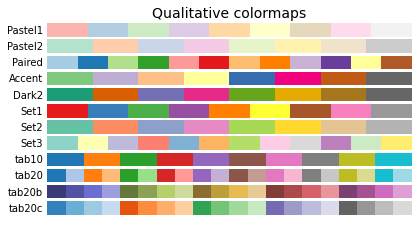

In [8]:
mostrar_paleta_de_cores(cmaps)

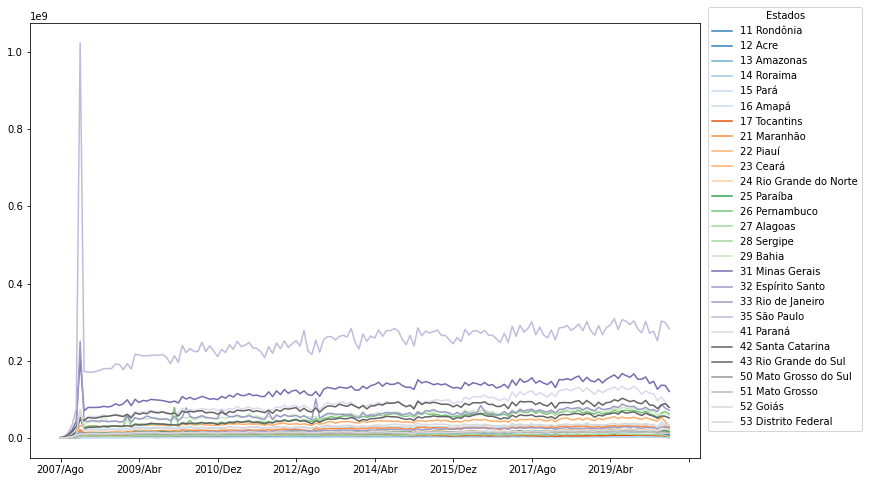

In [9]:
dados_usaveis.T.plot(figsize=(12, 8), cmap = cmaps['Qualitative'][11])
plt.legend(title= "Estados", loc ='lower right', bbox_to_anchor=(1.25, 0.05))
plt.show()

## Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [10]:
dados_usaveis_com_regiao = dados_usaveis.copy()
# solucao 01
regiao = []
for id in dados_usaveis.index:
  if id.startswith("1"):
    regiao.append("Norte")
  elif id.startswith("2"):
    regiao.append("Nordeste")
  elif id.startswith("3"):    
    regiao.append("Sudeste")
  elif id.startswith("4"):
    regiao.append("Sul")
  elif id.startswith("5"):
    regiao.append("Centro-Oeste")
dados_usaveis_com_regiao["Regiao"] = regiao

In [11]:
dados_usaveis_com_regiao2 = dados_usaveis.copy()

# solucao 02
nome_regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
dados_usaveis_com_regiao["Regiao"] = list(map(lambda estado_index: nome_regioes[estado_index[0]] ,  dados_usaveis.index))

In [12]:
dados_usaveis_com_regiao2 = dados_usaveis_com_regiao[["Regiao"] + dados_usaveis.columns[:-1].tolist()] # colocando a regiao na primeira coluna

In [13]:
dados_usaveis_com_regiao.head(2)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,Norte


## Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

In [14]:
dados_usaveis["Total"] = dados_usaveis.sum(axis=1)
ordenado_por_total = dados_usaveis.sort_values("Total", ascending=False)/milhao
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total.head(5)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,177.09,192.32,178.60,216.95,215.05,212.89,212.67,214.04,215.21,214.14,216.06,208.97,192.13,213.47,195.78,239.32,221.17,231.78,223.93,224.07,248.01,224.05,238.94,225.48,210.61,229.09,221.60,241.40,229.82,250.79,...,263.47,292.11,274.30,283.53,300.59,267.30,287.11,267.11,259.45,279.50,254.00,285.27,286.19,291.44,278.93,285.85,295.42,277.58,301.45,278.11,266.24,291.08,267.66,285.58,292.58,308.93,281.41,306.63,302.37,293.69,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71
31 Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,88.93,99.02,83.68,100.24,91.83,97.29,95.72,100.05,98.97,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.83,105.49,99.67,103.36,107.84,104.34,100.53,101.94,99.54,107.74,103.14,111.07,106.09,115.49,...,136.72,153.41,144.29,147.53,156.06,142.29,148.31,142.32,138.34,146.50,130.70,151.50,150.69,153.59,150.25,156.63,160.42,145.94,157.25,148.17,145.39,153.18,142.67,151.94,157.92,163.59,154.11,166.74,161.71,157.42,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,106.03,120.54,111.73,118.59,122.12,110.66,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.07,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.45,132.58,124.86,134.62,127.17,126.17,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,...,83.19,95.15,93.17,94.42,94.23,86.42,91.60,85.79,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.12,95.84,103.03,98.55,94.37,96.91,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93
33 Rio de Janeiro,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,43.01,60.87,40.66,52.75,48.90,51.17,57.23,53.49,51.22,48.48,48.67,49.69,44.41,55.99,44.82,54.46,78.12,56.01,51.44,53.86,57.87,53.74,52.37,50.22,50.89,74.01,61.11,55.32,55.81,59.07,...,64.52,74.32,69.85,73.15,74.54,68.73,73.08,69.26,67.32,72.34,65.02,74.39,74.52,79.26,75.91,77.49,78.78,72.84,79.14,73.95,70.69,79.47,73.80,74.92,76.67,82.44,78.19,87.98,83.31,81.15,82.25,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54


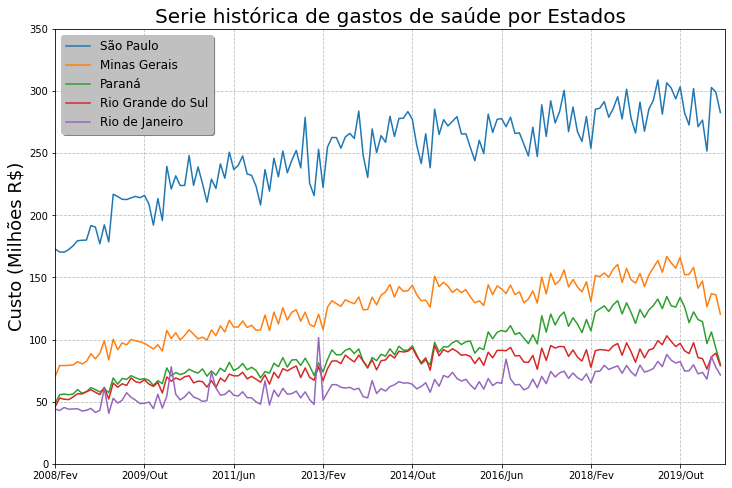

In [15]:
ax = ordenado_por_total.head(5).T.plot(figsize=(12, 8))

ax.set_xlim(0, 150)
ax.set_ylim(0, 350)
ax.set_title("Serie histórica de gastos de saúde por Estados", fontsize=20)
ax.set_ylabel("Custo (Milhões R$)", fontsize=18)
ax.grid(color='silver', linestyle='--')

# tirando o numero da frente do nome
nomes = ordenado_por_total.head(5).index
nomes = [ nome[3:] for nome in nomes ]
ax.legend(title=None, ncol = 1, fontsize=12, labels = nomes, shadow = True
         , facecolor = "silver", edgecolor = 'silver' )
plt.show()

## Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente 

O meu é Rio de Janeiro, portanto eu escolhi um outro, no caso o Estado da Bahia

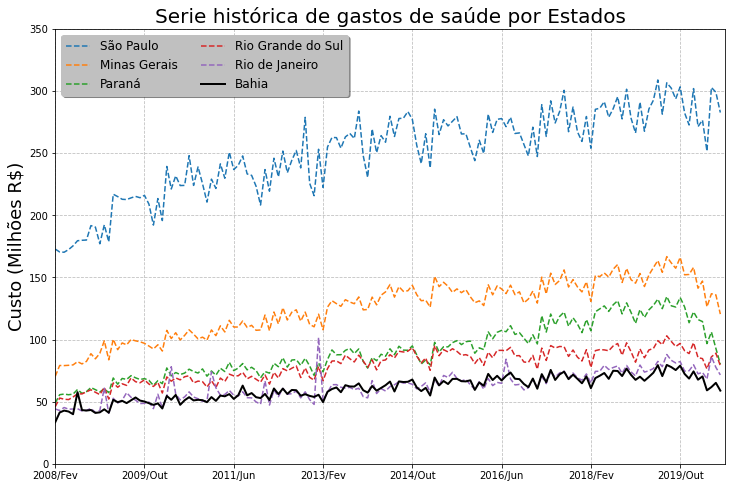

In [16]:
ordenado_por_total.head(5).T.plot(figsize=(12, 8), ls ="--")
ax = ordenado_por_total.loc["29 Bahia"].T.plot(figsize=(12, 8),
                            color="black",
                            lw=2)

ax.set_xlim(0, 150)
ax.set_ylim(0, 350)
ax.set_title("Serie histórica de gastos de saúde por Estados", fontsize=20)
ax.set_ylabel("Custo (Milhões R$)", fontsize=18)
ax.grid(color='silver', linestyle='--')

# tirando o numero da frente do nome
nomes = ordenado_por_total.head(5).index.tolist() + ["29 Bahia"]
nomes = [ nome[3:] for nome in nomes ]
ax.legend(title=None, ncol = 2, fontsize=12, labels = nomes, shadow = True
         , facecolor = "silver", edgecolor = 'silver' )
plt.show()

## Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

In [17]:
regiao_sudeste = dados_usaveis_com_regiao.query("Regiao == 'Sudeste'").drop("Regiao", axis=1)
#dados_usaveis_com_regiao[dados_usaveis_com_regiao["Regiao"] == "Sudeste"].drop("Regiao", axis=1) # opecao alternativa
colunas_interessadas = ordenado_por_total.columns[5:]
regiao_sudeste = regiao_sudeste[colunas_interessadas]/ milhao

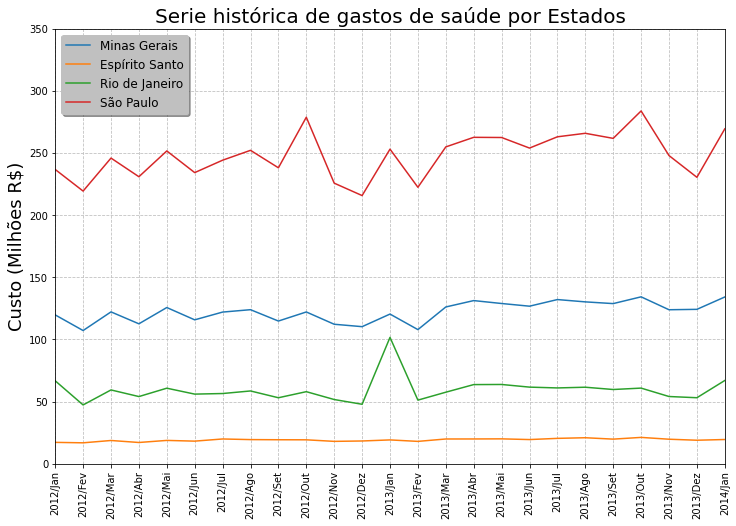

In [58]:
ax = regiao_sudeste.loc[:,'2012/Jan':'2014/Jan'].T.plot(figsize=(12, 8))

ax.set_xlim(0, 24)
ax.set_ylim(0, 350)
#
labels = regiao_sudeste.loc[:,'2012/Jan':'2014/Jan'].columns
plt.xticks(x, labels, rotation=90)
x = range(0, len(labels))
#ax.set_xticklabels(rotation=45)
#ax.set_xticklabels(xlabels, rotation=45)
ax.set_title("Serie histórica de gastos de saúde por Estados", fontsize=20)
ax.set_ylabel("Custo (Milhões R$)", fontsize=18)
ax.grid(color='silver', linestyle='--')

# tirando o numero da frente do nome
nomes = regiao_sudeste.head(5).index
nomes = [ nome[3:] for nome in nomes ]
ax.legend(title=None, ncol = 1, fontsize=12, labels = nomes, shadow = True
         , facecolor = "silver", edgecolor = 'silver' )


plt.show()

O grafico apresenta apenas dos 1 pico realmente precepitivel no periodo de Jan/2012 a Jan/2014. Este pico está no Estado do Rio de Janeiro no meses de 2013/Jan.

Os picos no Estado de São Paulo parece ter um natureza completamente diferentes do Rio de Janeiro. 

## Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

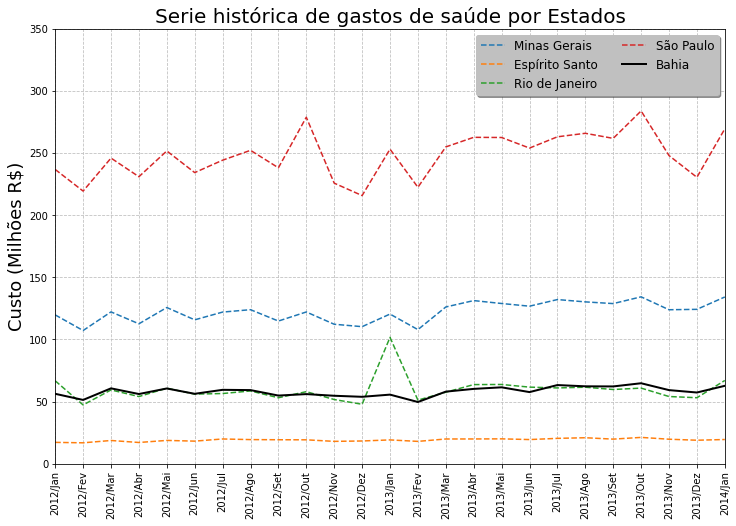

In [64]:
ax = regiao_sudeste.loc[:,'2012/Jan':'2014/Jan'].T.plot(figsize=(12, 8), ls ="--")
ax = ordenado_por_total.loc["29 Bahia",'2012/Jan':'2014/Jan'].T.plot(figsize=(12, 8),
                            color="black",
                            lw=2)
ax.set_xlim(0, 24)
ax.set_ylim(0, 350)
#
labels = regiao_sudeste.loc[:,'2012/Jan':'2014/Jan'].columns
plt.xticks(x, labels, rotation=90)
x = range(0, len(labels))
ax.set_title("Serie histórica de gastos de saúde por Estados", fontsize=20)
ax.set_ylabel("Custo (Milhões R$)", fontsize=18)
ax.grid(color='silver', linestyle='--')

# tirando o numero da frente do nome
nomes = regiao_sudeste.index.tolist() + ["29 Bahia"]
nomes = [ nome[3:] for nome in nomes ]
ax.legend(title=None, ncol = 2, fontsize=12, labels = nomes, shadow = True
         , facecolor = "silver", edgecolor = 'silver' )


plt.show()

Ao que tudo indica o pico do Rio de Janeiro foi um fenomeno local ao proprio estado.